In [3]:
import pandas as pd
import numpy as np
cabi_hr = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/bike+sharing+dataset/hour.csv')
cabi_hr_copy = cabi_hr.copy() 

In [4]:
cabi_hr.tail() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
#hunting nans
nan_indices = cabi_hr.isna()
print(nan_indices.any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [6]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=cabi_hr.isna().sum().sum()
print(nan_count)

0


In [7]:
#hunting duplicates, none found
duplicateRows = cabi_hr[cabi_hr.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [8]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
cabi_hr['dteday'] = pd.to_datetime(cabi_hr['dteday']) + cabi_hr['hr'].astype('timedelta64[h]')
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [9]:
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31 20:00:00,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31 21:00:00,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31 22:00:00,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [10]:
# we are creating a new column called "season_name", based on months, because the dataset
#season calculator is way way off
def sname_maker(month):
    if month == 12:
        return 'winter'
    elif month <= 2:
        return 'winter'
    elif month <= 5:
        return 'spring'
    elif month <= 8:
        return 'summer'
    elif month <= 11:
        return 'fall'

cabi_hr['season_name'] = cabi_hr['mnth'].apply(sname_maker)



In [11]:
# we are creating a new column called "year", based on days of week, because the dataset
#days are 0-6, 0 is sunday, 6 is saturday
def yearname_maker(yr):
    if yr == 0:
        return '2011'
    elif yr == 1:
        return '2012'

cabi_hr['year'] = cabi_hr['yr'].apply(yearname_maker)

In [12]:
cabi_hr.head()
cabi_hr.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,year
17374,17375,2012-12-31 19:00:00,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,2012
17375,17376,2012-12-31 20:00:00,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,2012
17376,17377,2012-12-31 21:00:00,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,2012
17377,17378,2012-12-31 22:00:00,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,2012
17378,17379,2012-12-31 23:00:00,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,winter,2012


In [13]:
# we are creating a new column called "dayname", based on days of week, because the dataset
#days are 0-6, 0 is sunday, 6 is saturday
def dname_maker(day):
    if day == 0:
        return 'sunday'
    elif day == 1:
        return 'monday'
    elif day == 2:
        return 'tuesday'
    elif day == 3:
        return 'wednesday'
    elif day == 4:
        return 'thursday'
    elif day == 5:
        return 'friday'
    elif day == 6:
        return 'saturday'

cabi_hr['dayname'] = cabi_hr['weekday'].apply(dname_maker)

In [14]:
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,year,dayname
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,2011,saturday
1,2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,2011,saturday
2,3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,2011,saturday
3,4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,2011,saturday
4,5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,2011,saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,2012,monday
17375,17376,2012-12-31 20:00:00,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,2012,monday
17376,17377,2012-12-31 21:00:00,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,2012,monday
17377,17378,2012-12-31 22:00:00,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,2012,monday


In [15]:
#attempting denormalization of temp column

t_min = -8
t_max= 39
result = []
for value in cabi_hr['temp']:
    denorm = (value * (t_max - t_min)+ t_min)
    result.append(denorm)


cabi_hr['temp_in_c'] = result
cabi_hr



# temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39.
#temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

# atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50.
# https://islp.readthedocs.io/en/latest/datasets/Bikeshare.html

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_name,year,dayname,temp_in_c
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0000,3,13,16,winter,2011,saturday,3.28
1,2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0000,8,32,40,winter,2011,saturday,2.34
2,3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0000,5,27,32,winter,2011,saturday,2.34
3,4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0000,3,10,13,winter,2011,saturday,3.28
4,5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0000,0,1,1,winter,2011,saturday,3.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,1,1,12,19,0,1,1,2,...,0.2576,0.60,0.1642,11,108,119,winter,2012,monday,4.22
17375,17376,2012-12-31 20:00:00,1,1,12,20,0,1,1,2,...,0.2576,0.60,0.1642,8,81,89,winter,2012,monday,4.22
17376,17377,2012-12-31 21:00:00,1,1,12,21,0,1,1,1,...,0.2576,0.60,0.1642,7,83,90,winter,2012,monday,4.22
17377,17378,2012-12-31 22:00:00,1,1,12,22,0,1,1,1,...,0.2727,0.56,0.1343,13,48,61,winter,2012,monday,4.22


In [16]:
cabi_hr.loc[17350:, 'temp_in_c']

17350    7.98
17351    2.34
17352    1.40
17353    1.40
17354    1.40
17355    0.46
17356    0.46
17357   -0.48
17358   -0.48
17359   -1.42
17360   -0.48
17361   -0.48
17362   -0.48
17363   -1.42
17364    0.46
17365    1.40
17366    2.34
17367    3.28
17368    4.22
17369    5.16
17370    5.16
17371    4.22
17372    4.22
17373    4.22
17374    4.22
17375    4.22
17376    4.22
17377    4.22
17378    4.22
Name: temp_in_c, dtype: float64

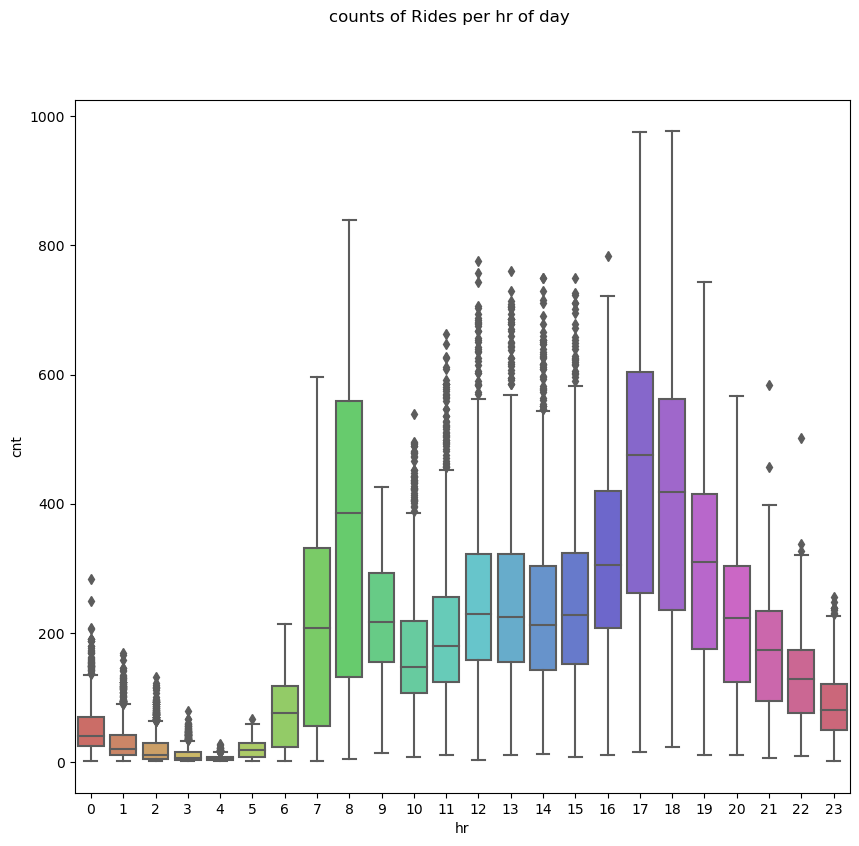

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,9))

sns.boxplot(data=cabi_hr, x='hr', y='cnt', palette='hls')
plt.suptitle('counts of Rides per hr of day')
plt.show()

In [18]:
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [19]:
#converting multiple columns to categorical
cabi_hr = cabi_hr.astype({'season': 'category', 'yr': 'category', 'mnth': 'category', 
                          'hr': 'category', 'holiday': 'category', 'weekday': 'category',
                           'workingday': 'category', 'weathersit': 'category', 
                           'season_name': 'category', 'dayname': 'category'})
cabi_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [20]:
cabi_hr.loc[cabi_hr['holiday'] == 0, 'is_holiday'] = 'No'
cabi_hr.loc[cabi_hr['holiday'] == 1, 'is_holiday'] = 'Yes'
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,...,0.81,0.0000,3,13,16,winter,2011,saturday,3.28,No
1,2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,...,0.80,0.0000,8,32,40,winter,2011,saturday,2.34,No
2,3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,...,0.80,0.0000,5,27,32,winter,2011,saturday,2.34,No
3,4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,...,0.75,0.0000,3,10,13,winter,2011,saturday,3.28,No
4,5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,...,0.75,0.0000,0,1,1,winter,2011,saturday,3.28,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,1,1,12,19,0,1,1,2,...,0.60,0.1642,11,108,119,winter,2012,monday,4.22,No
17375,17376,2012-12-31 20:00:00,1,1,12,20,0,1,1,2,...,0.60,0.1642,8,81,89,winter,2012,monday,4.22,No
17376,17377,2012-12-31 21:00:00,1,1,12,21,0,1,1,1,...,0.60,0.1642,7,83,90,winter,2012,monday,4.22,No
17377,17378,2012-12-31 22:00:00,1,1,12,22,0,1,1,1,...,0.56,0.1343,13,48,61,winter,2012,monday,4.22,No


In [21]:
cabi_hr.loc[cabi_hr['season_name'] == 'winter', 'season'] = 4
cabi_hr.loc[cabi_hr['season_name'] == 'spring', 'season'] = 1
cabi_hr.loc[cabi_hr['season_name'] == 'summer', 'season'] = 2
cabi_hr.loc[cabi_hr['season_name'] == 'fall', 'season'] = 3
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday
0,1,2011-01-01 00:00:00,4,0,1,0,0,6,0,1,...,0.81,0.0000,3,13,16,winter,2011,saturday,3.28,No
1,2,2011-01-01 01:00:00,4,0,1,1,0,6,0,1,...,0.80,0.0000,8,32,40,winter,2011,saturday,2.34,No
2,3,2011-01-01 02:00:00,4,0,1,2,0,6,0,1,...,0.80,0.0000,5,27,32,winter,2011,saturday,2.34,No
3,4,2011-01-01 03:00:00,4,0,1,3,0,6,0,1,...,0.75,0.0000,3,10,13,winter,2011,saturday,3.28,No
4,5,2011-01-01 04:00:00,4,0,1,4,0,6,0,1,...,0.75,0.0000,0,1,1,winter,2011,saturday,3.28,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,4,1,12,19,0,1,1,2,...,0.60,0.1642,11,108,119,winter,2012,monday,4.22,No
17375,17376,2012-12-31 20:00:00,4,1,12,20,0,1,1,2,...,0.60,0.1642,8,81,89,winter,2012,monday,4.22,No
17376,17377,2012-12-31 21:00:00,4,1,12,21,0,1,1,1,...,0.60,0.1642,7,83,90,winter,2012,monday,4.22,No
17377,17378,2012-12-31 22:00:00,4,1,12,22,0,1,1,1,...,0.56,0.1343,13,48,61,winter,2012,monday,4.22,No


In [22]:
cabi_hr = cabi_hr.astype({'is_holiday': 'category'})
cabi_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

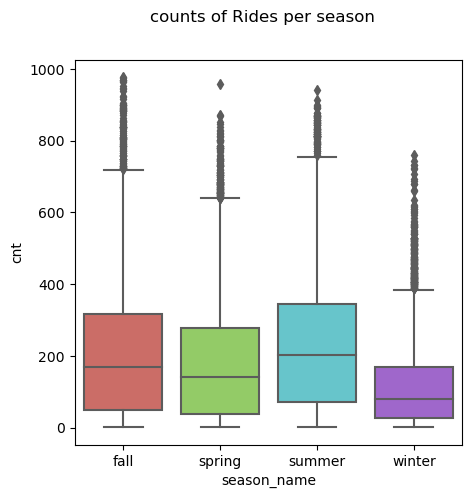

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))

sns.boxplot(data=cabi_hr, x='season_name', y='cnt', palette='hls')
plt.suptitle('counts of Rides per season')
plt.show()

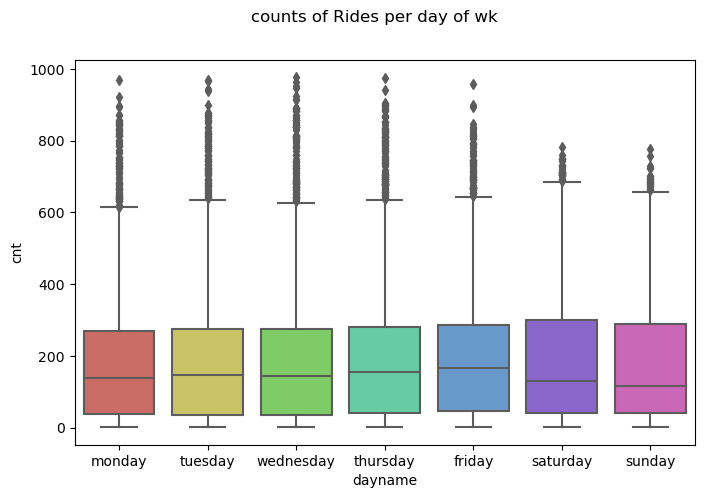

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=cabi_hr, x='dayname', y='cnt', palette='hls', order=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.suptitle('counts of Rides per day of wk')
plt.show()

In [25]:
corr_cabi_hr = cabi_hr.corr()
corr_cabi_hr

/var/folders/dt/36zskqd97kv75gn6l517twyh0000gn/T/ipykernel_11997/4244322749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cabi_hr = cabi_hr.corr()


,instant,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in_c
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,0.136178
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,1.000000
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929,0.987672
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911,-0.069881
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234,-0.023125
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564,0.459616
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151,0.335361
cnt,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000,0.404772
temp_in_c,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,1.000000


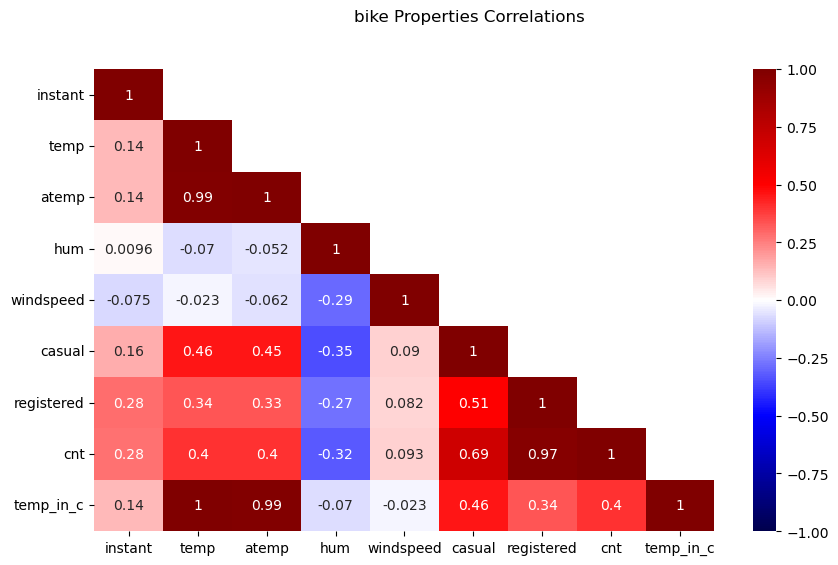

In [26]:
#seaborn heatmap using .corr
fig, ax = plt.subplots(figsize=(10,6))

# Create a mask
mask = np.triu(np.ones_like(corr_cabi_hr, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(corr_cabi_hr, annot=True, cmap="seismic", mask=mask, vmin=-1.0, vmax=1.0)
fig.suptitle('bike Properties Correlations')
plt.show()

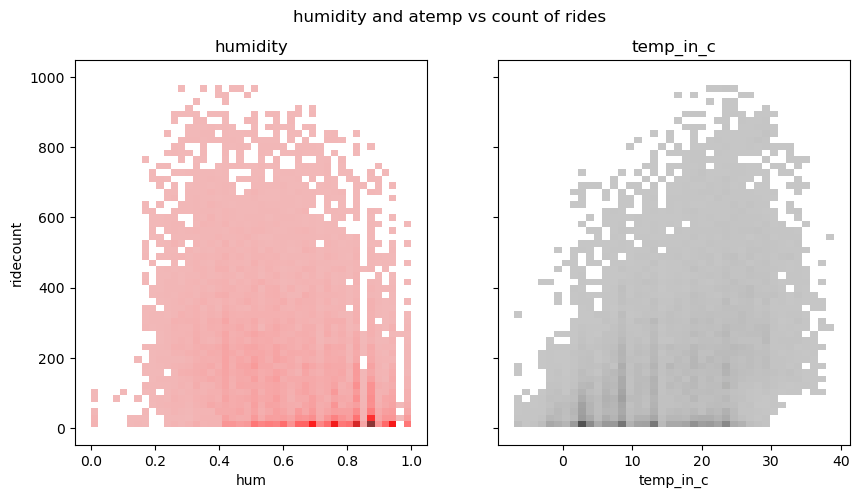

In [27]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))


sns.histplot(data=cabi_hr, x = 'hum', y='cnt', ax=ax[0], color='red',).set(title='humidity', ylabel = 'ridecount')
sns.histplot(data=cabi_hr, x = 'temp_in_c',y='cnt', ax=ax[1], color='white', ).set(title='temp_in_c', ylabel = 'ridecount')
fig.suptitle('humidity and atemp vs count of rides')

ax[0].set_ylim(top=1050)
ax[1].set_ylim(top=1050)
plt.show()

[Text(0.5, 1.0, 'humidity'), Text(0, 0.5, 'ridecount')]

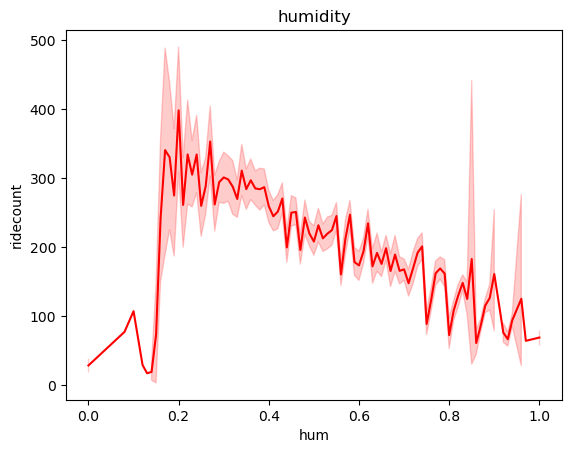

In [28]:
sns.lineplot(data=cabi_hr, x = 'hum', y='cnt', color='red').set(title='humidity', ylabel = 'ridecount')


In [29]:
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

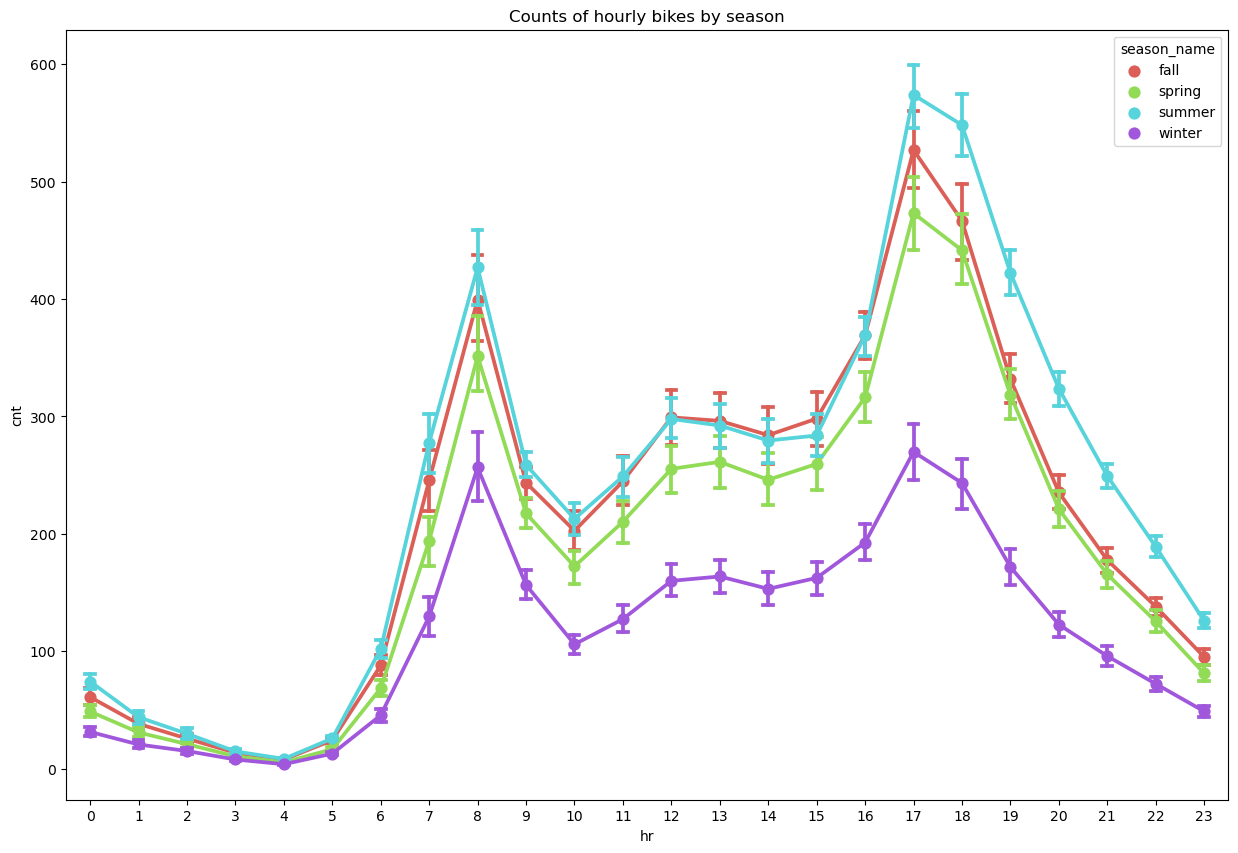

In [30]:
#counts by season graph
fig,ax = plt.subplots(figsize=(15,10))

sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="season_name", 
    capsize=.2, palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by season")
plt.show()

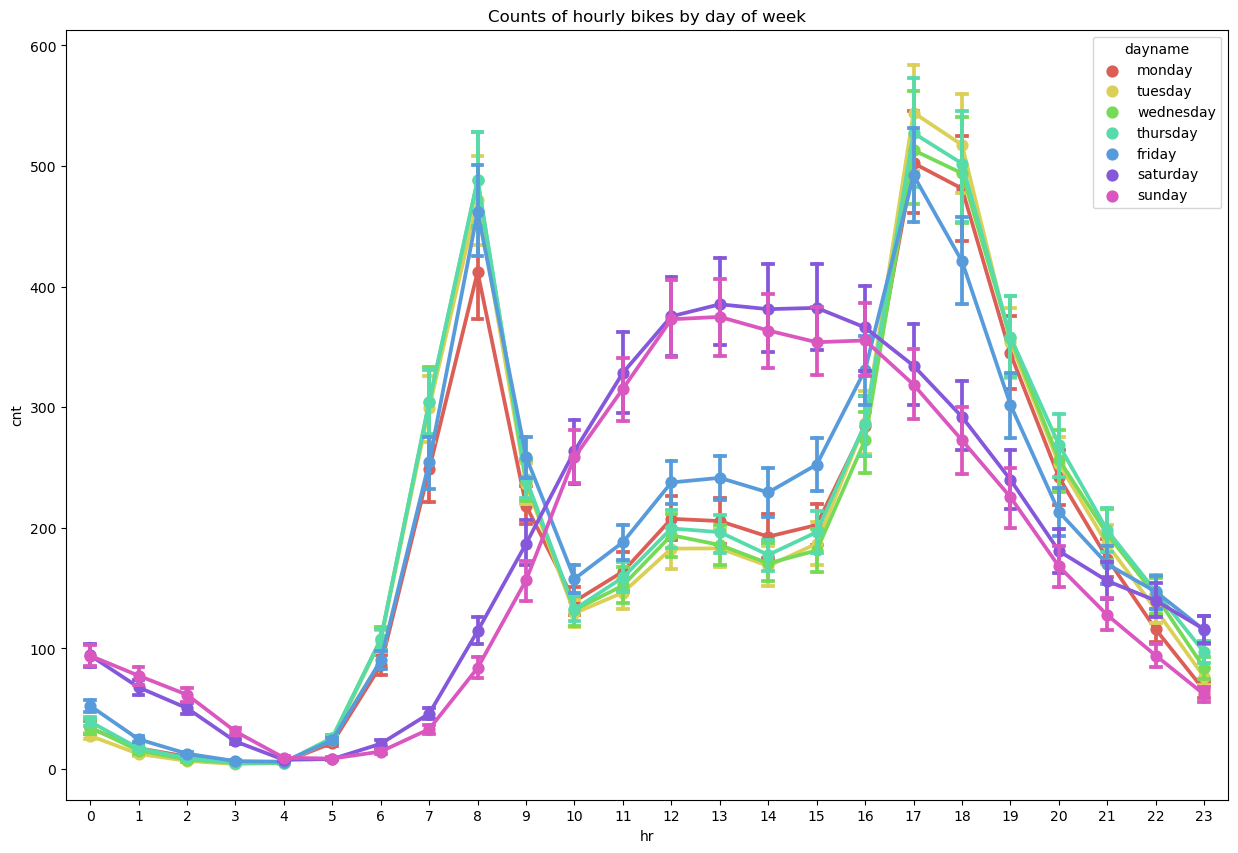

In [31]:

fig,ax = plt.subplots(figsize=(15,10))
hue_order=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="dayname", hue_order=hue_order, capsize=.2,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by day of week")
plt.show()

Ideas: Could use ML to predict how many bikes are going to be in use during certain hour periods

In [32]:
cabi_hr.loc[cabi_hr['workingday'] == 0, 'is_workingday'] = 'No'
cabi_hr.loc[cabi_hr['workingday'] == 1, 'is_workingday'] = 'Yes'
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday,is_workingday
0,1,2011-01-01 00:00:00,4,0,1,0,0,6,0,1,...,0.0,3,13,16,winter,2011,saturday,3.28,No,No
1,2,2011-01-01 01:00:00,4,0,1,1,0,6,0,1,...,0.0,8,32,40,winter,2011,saturday,2.34,No,No
2,3,2011-01-01 02:00:00,4,0,1,2,0,6,0,1,...,0.0,5,27,32,winter,2011,saturday,2.34,No,No
3,4,2011-01-01 03:00:00,4,0,1,3,0,6,0,1,...,0.0,3,10,13,winter,2011,saturday,3.28,No,No
4,5,2011-01-01 04:00:00,4,0,1,4,0,6,0,1,...,0.0,0,1,1,winter,2011,saturday,3.28,No,No


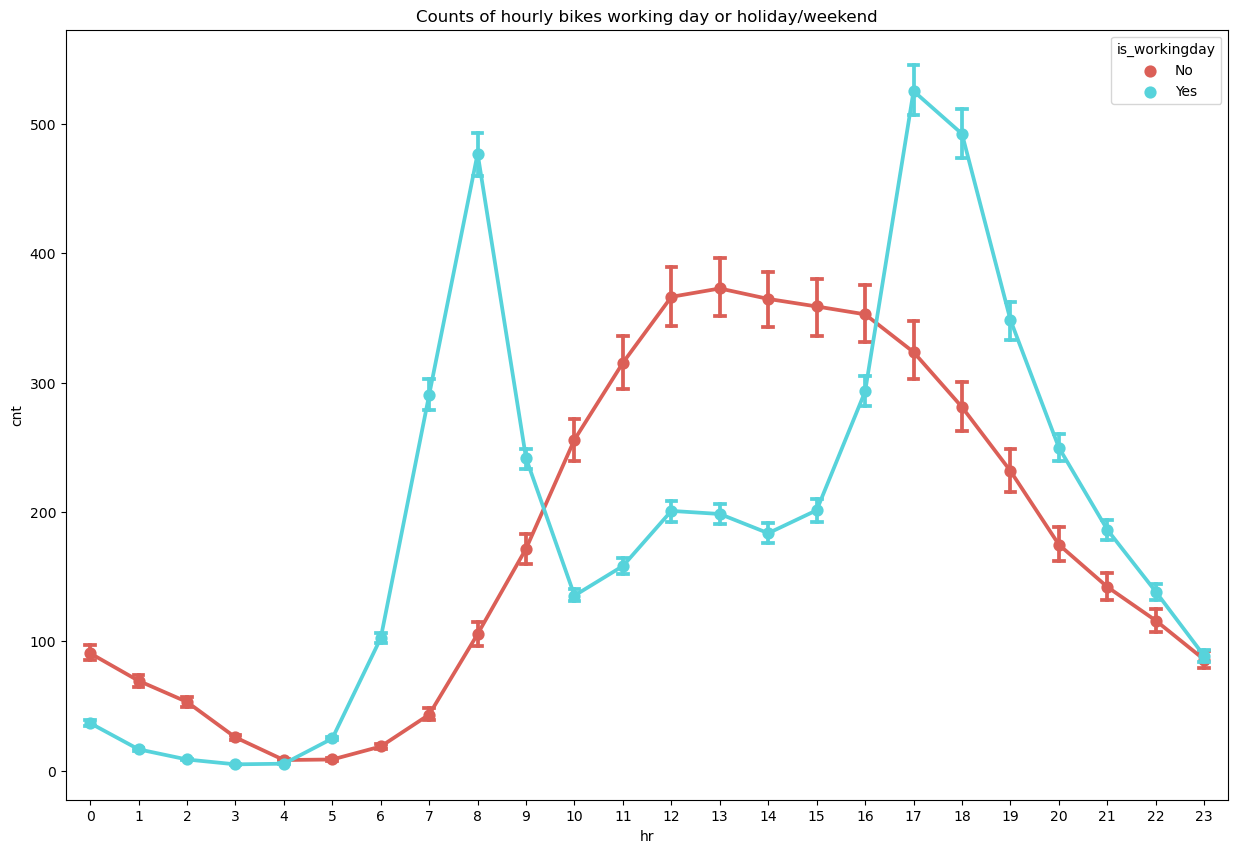

In [33]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="is_workingday", capsize=.2,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes working day or holiday/weekend")
plt.show()

In [34]:
cabi_hr.loc[cabi_hr['weathersit'] == 1, 'weathersit_desc'] = 'good'
cabi_hr.loc[cabi_hr['weathersit'] == 2, 'weathersit_desc'] = 'less_good_mist'
cabi_hr.loc[cabi_hr['weathersit'] == 3, 'weathersit_desc'] = 'worse_light_precip'
cabi_hr.loc[cabi_hr['weathersit'] == 4, 'weathersit_desc'] = 'bad_heavy_precip'
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday,is_workingday,weathersit_desc
0,1,2011-01-01 00:00:00,4,0,1,0,0,6,0,1,...,3,13,16,winter,2011,saturday,3.28,No,No,good
1,2,2011-01-01 01:00:00,4,0,1,1,0,6,0,1,...,8,32,40,winter,2011,saturday,2.34,No,No,good
2,3,2011-01-01 02:00:00,4,0,1,2,0,6,0,1,...,5,27,32,winter,2011,saturday,2.34,No,No,good
3,4,2011-01-01 03:00:00,4,0,1,3,0,6,0,1,...,3,10,13,winter,2011,saturday,3.28,No,No,good
4,5,2011-01-01 04:00:00,4,0,1,4,0,6,0,1,...,0,1,1,winter,2011,saturday,3.28,No,No,good


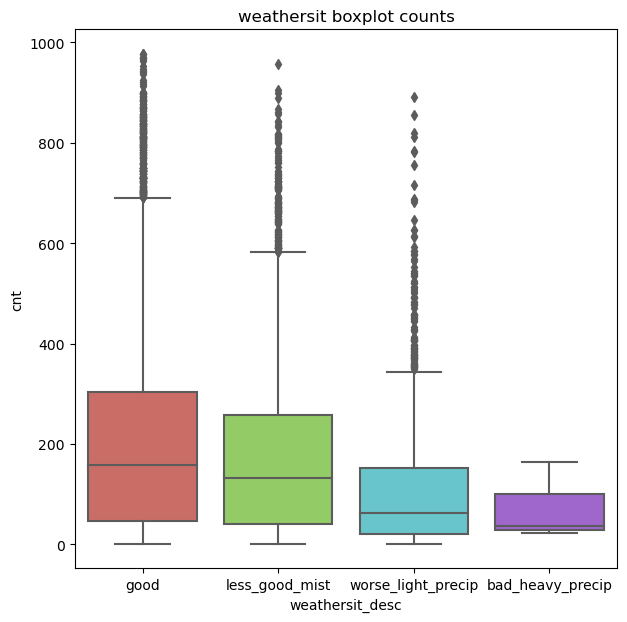

In [35]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=cabi_hr, x="weathersit_desc", y="cnt",
     palette="hls", ax=ax)
ax.set(title="weathersit boxplot counts")
plt.show()

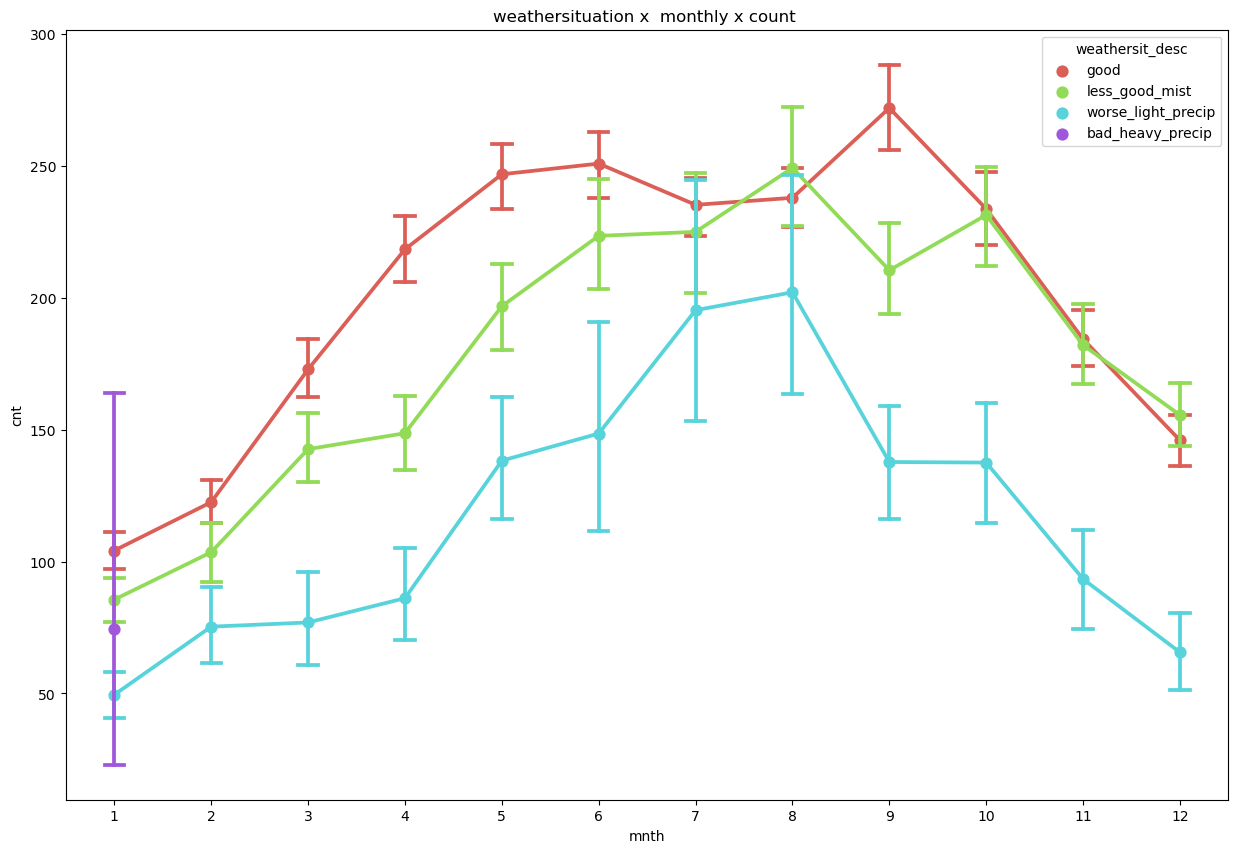

In [36]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=cabi_hr, x="mnth", y="cnt", hue="weathersit_desc", capsize=.2,
     palette="hls", ax=ax)
ax.set(title="weathersituation x  monthly x count ")
plt.show()

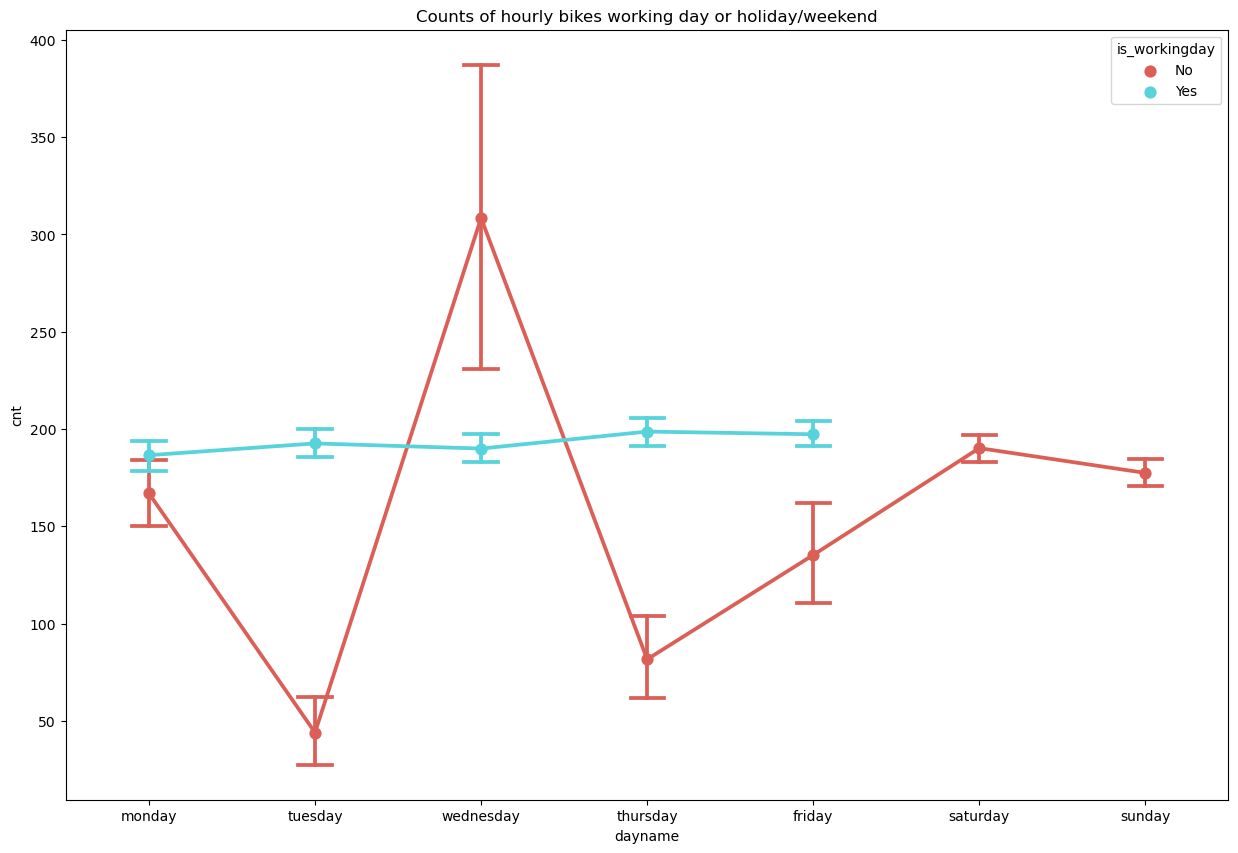

In [37]:
fig,ax = plt.subplots(figsize=(15,10))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
sns.pointplot(data=cabi_hr, x="dayname", y="cnt", hue="is_workingday", capsize=.2, order=xorder,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes working day or holiday/weekend")
plt.show()

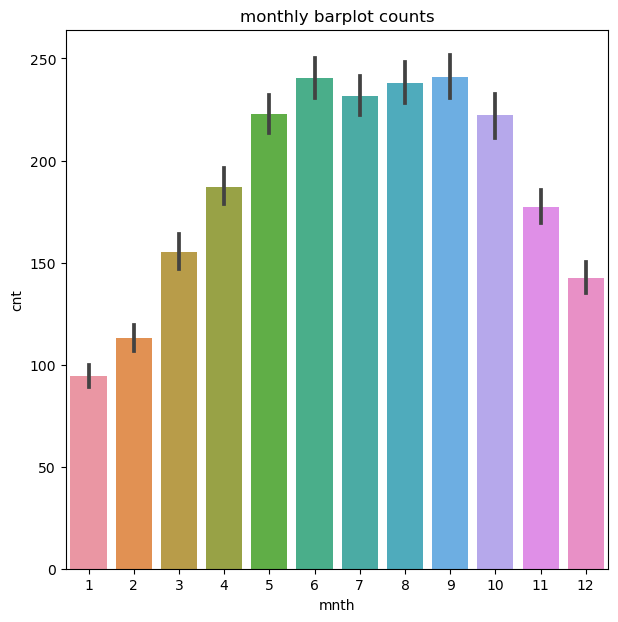

In [38]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="mnth", y="cnt",)
ax.set(title="monthly barplot counts")
plt.show()

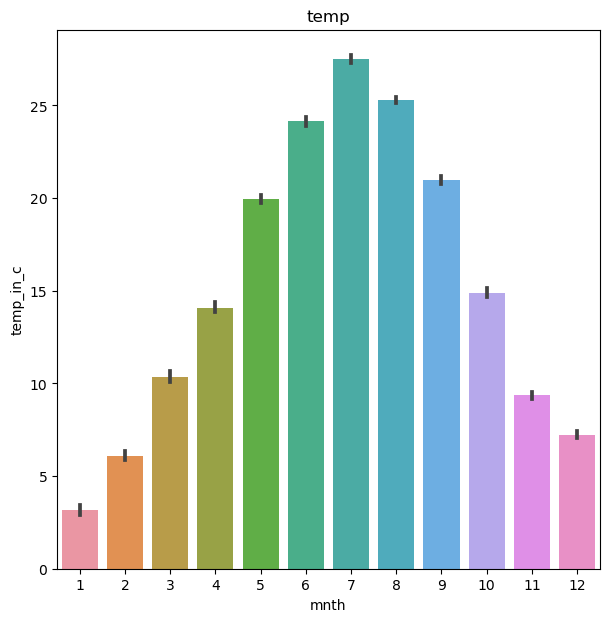

In [39]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="mnth", y="temp_in_c",)
ax.set(title="temp")
plt.show()

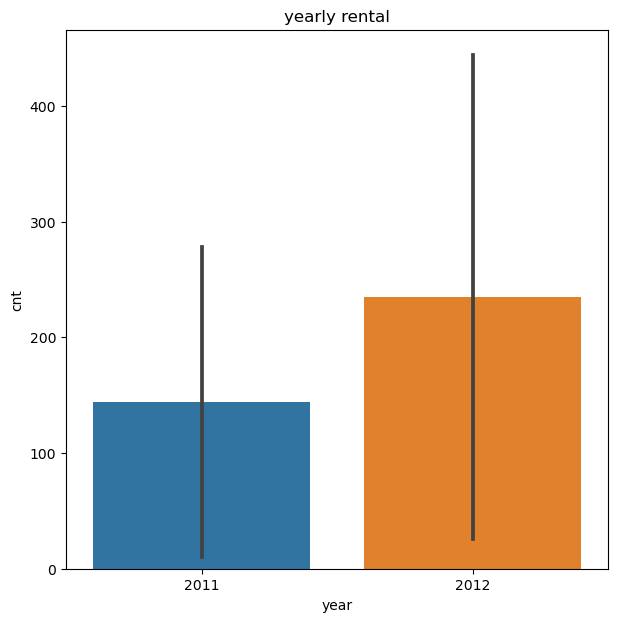

In [40]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="year", y='cnt', errorbar='sd')
ax.set(title="yearly rental")
plt.show()

In [41]:
cabi_hr.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in_c
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.358397
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.050138
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,7.980000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,15.500000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.020000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000


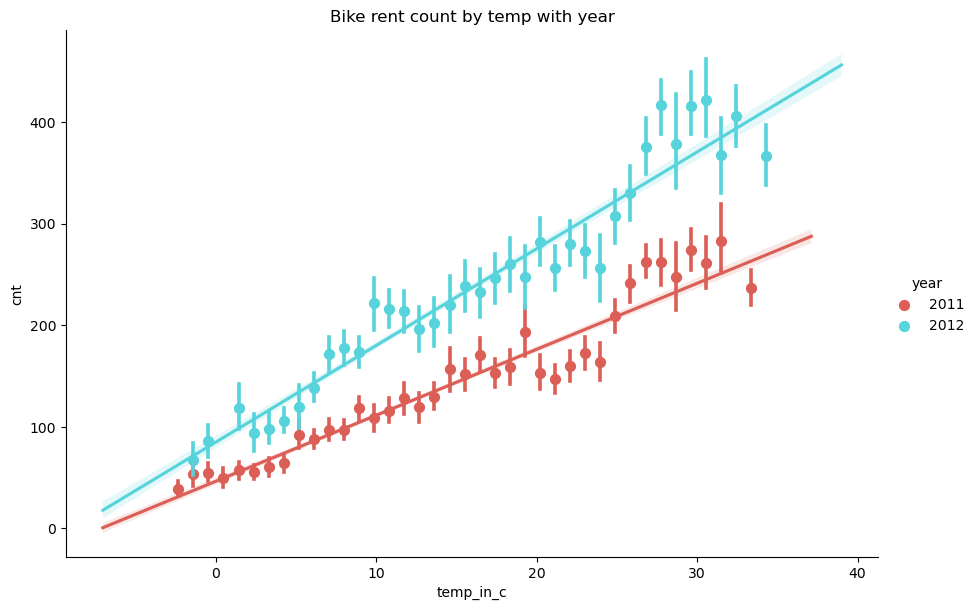

In [42]:
sns.lmplot(data=cabi_hr, x="temp_in_c", y='cnt', hue='year',height=6, aspect=1.5, palette='hls', x_bins=100 )
fig.suptitle('Temp Year Trend bike counts')
plt.title('Bike rent count by temp with year')
plt.show()

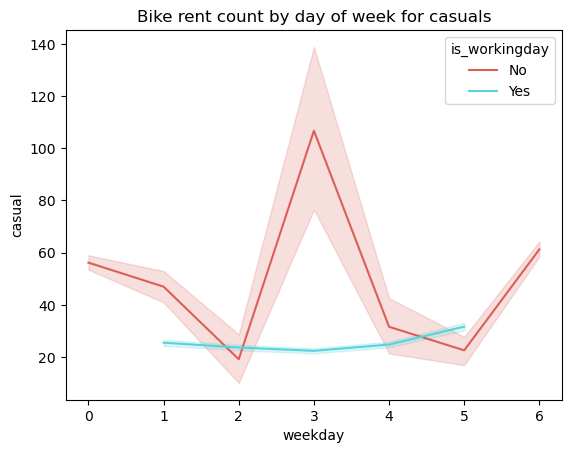

In [43]:
sns.lineplot(data=cabi_hr, x="weekday", y='casual', hue='is_workingday', palette='hls')
fig.suptitle('Temp Year Trend bike counts')
plt.title('Bike rent count by day of week for casuals')
plt.show()

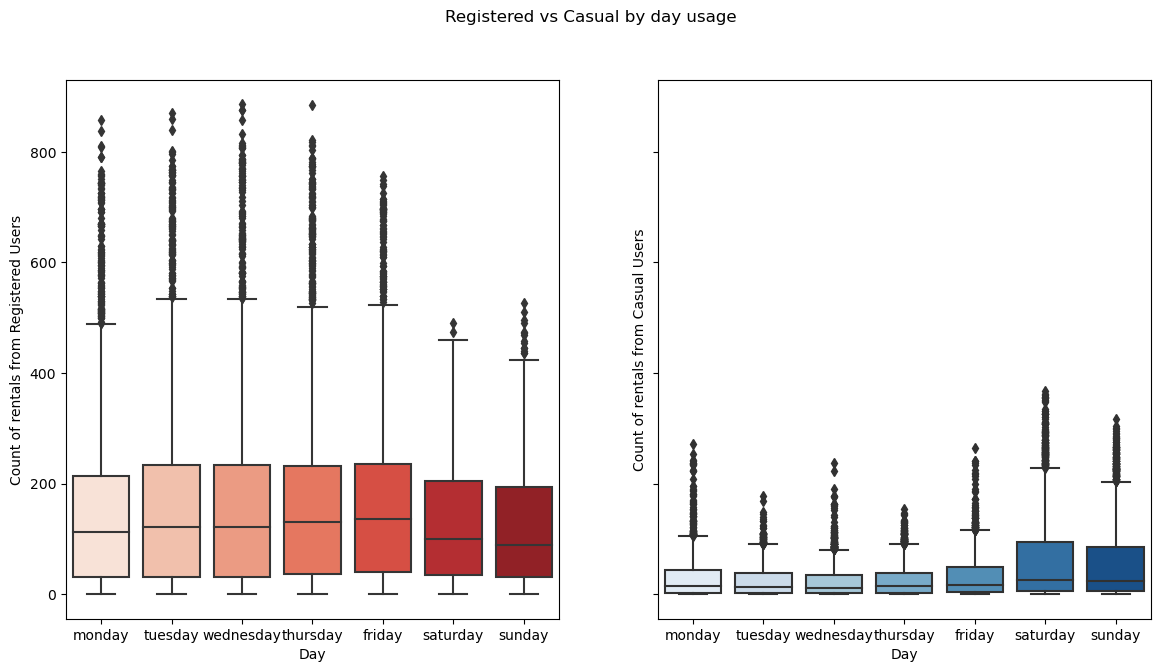

In [44]:
#Registered vs Casual by day usage box
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.boxplot(data=cabi_hr, x='dayname', y='registered', ax=ax[0], palette=("Reds"), order=xorder)
sns.boxplot(data=cabi_hr, x='dayname', y='casual', ax=ax[1], palette="Blues", order=xorder)

fig.suptitle('Registered vs Casual by day usage')

ax[0].set(xlabel = 'Day',
          ylabel = 'Count of rentals from Registered Users')

ax[1].set(xlabel = 'Day',
          ylabel = 'Count of rentals from Casual Users')

plt.show()

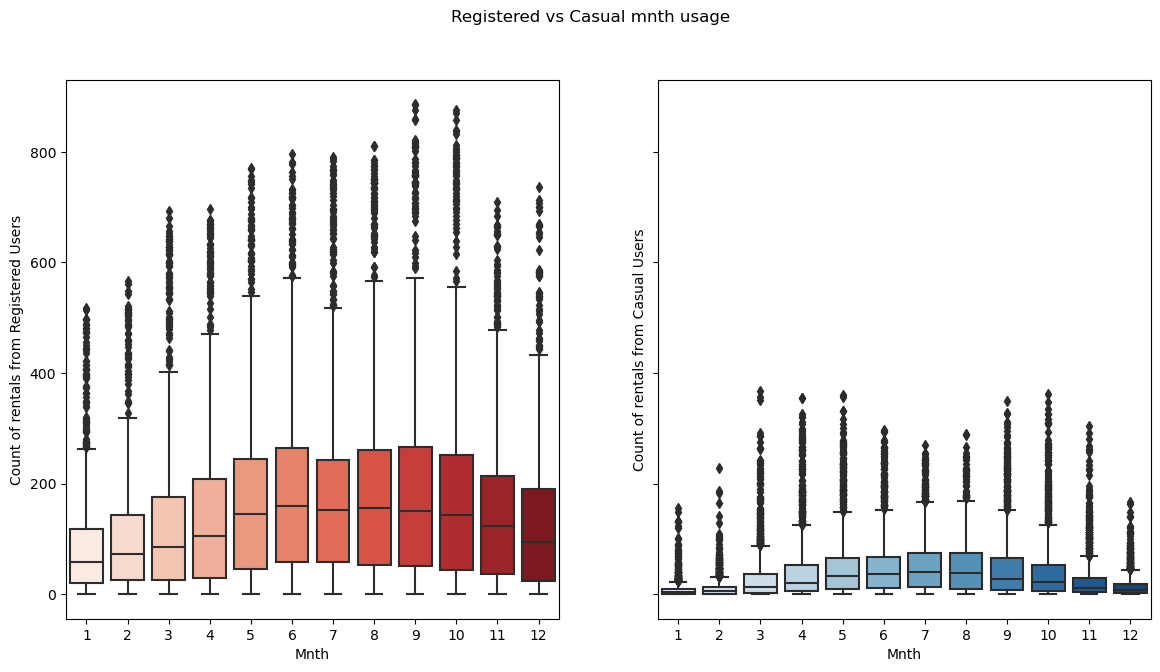

In [45]:
#Registered vs Casual by mnth usage box
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))
#xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.boxplot(data=cabi_hr, x='mnth', y='registered', ax=ax[0], palette=("Reds"))
sns.boxplot(data=cabi_hr, x='mnth', y='casual', ax=ax[1], palette="Blues")

fig.suptitle('Registered vs Casual mnth usage')

ax[0].set(xlabel = 'Mnth',
          ylabel = 'Count of rentals from Registered Users')

ax[1].set(xlabel = 'Mnth',
          ylabel = 'Count of rentals from Casual Users')

plt.show()

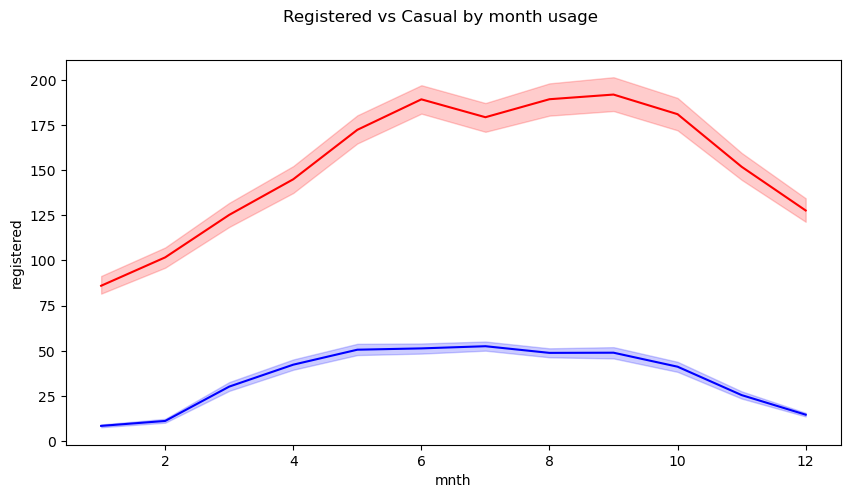

In [46]:
#Registered vs Casual by month  usage line chart
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10,5))
#xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.lineplot(data=cabi_hr, x='mnth', y='registered', ax=ax, color='red', )
sns.lineplot(data=cabi_hr, x='mnth', y='casual', ax=ax, color='blue')

fig.suptitle('Registered vs Casual by month usage')

# ax[0].set(xlabel = 'day of week. 0=sunday, 6=saturday',
#           ylabel = 'Count of rentals from Registered Users',
#           title = 'Registered Users')

# ax[1].set(xlabel = 'day of week  0=sunday, 6=saturday',
#           ylabel = 'Count of rentals from Casual Users',
#           title = 'Casual Users')
# ax[0].set_xticks('weekday')
# ax[0].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
# ax[1].set_xticks('weekday')
# ax[1].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])

plt.show()

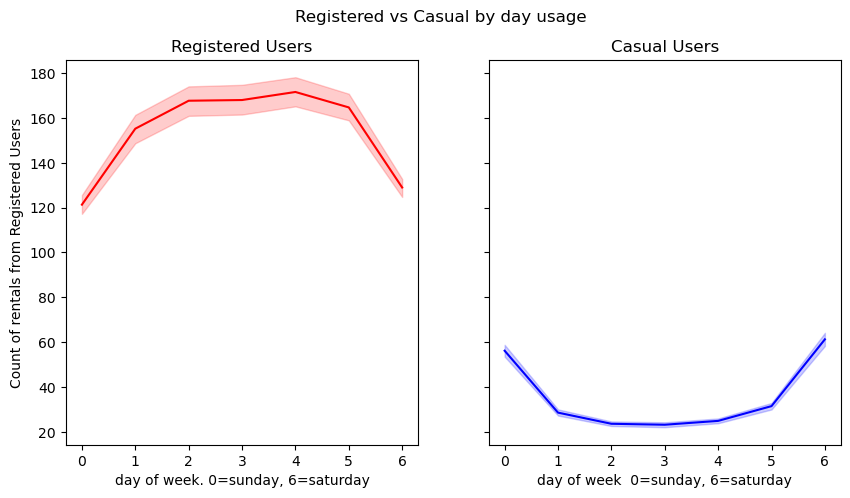

In [47]:
#Registered vs Casual by day of week usage line chart
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.lineplot(data=cabi_hr, x='weekday', y='registered', ax=ax[0], color='red', )
sns.lineplot(data=cabi_hr, x='weekday', y='casual', ax=ax[1],color='blue')

fig.suptitle('Registered vs Casual by day usage')

ax[0].set(xlabel = 'day of week. 0=sunday, 6=saturday',
          ylabel = 'Count of rentals from Registered Users',
          title = 'Registered Users')

ax[1].set(xlabel = 'day of week  0=sunday, 6=saturday',
          ylabel = 'Count of rentals from Casual Users',
          title = 'Casual Users')
# ax[0].set_xticks('weekday')
# ax[0].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
# ax[1].set_xticks('weekday')
# ax[1].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])

plt.show()

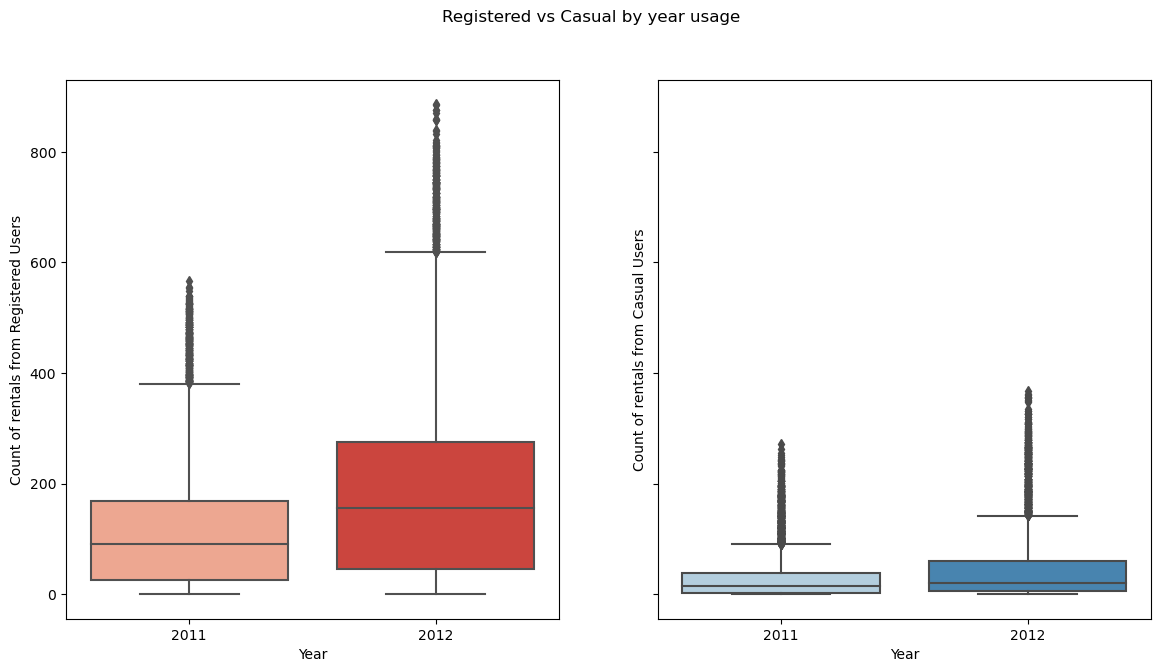

In [48]:
#Registered vs Casual by year usage
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))
#xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.boxplot(data=cabi_hr, x='year', y='registered', ax=ax[0], palette=("Reds"))
sns.boxplot(data=cabi_hr, x='year', y='casual', ax=ax[1], palette="Blues")

fig.suptitle('Registered vs Casual by year usage')

ax[0].set(xlabel = 'Year',
          ylabel = 'Count of rentals from Registered Users')

ax[1].set(xlabel = 'Year',
          ylabel = 'Count of rentals from Casual Users')

plt.show()

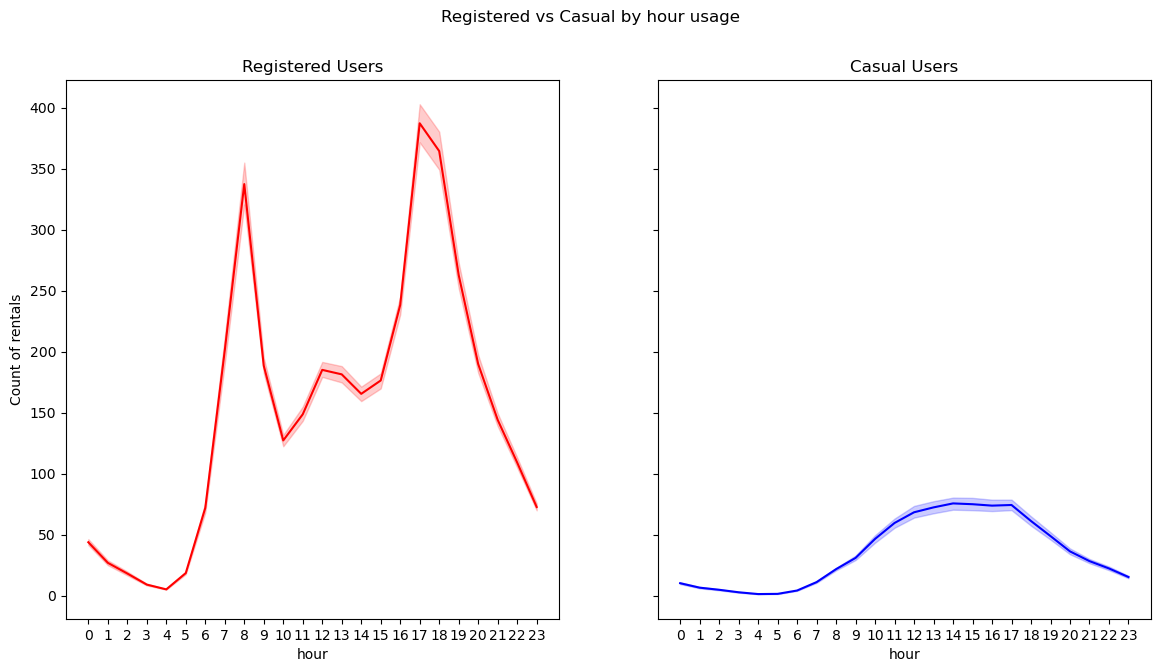

In [49]:
#Registered vs Casual by hour usage
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))


sns.lineplot(data=cabi_hr, x='hr', y='registered', ax=ax[0], color='red')
sns.lineplot(data=cabi_hr, x='hr', y='casual', ax=ax[1],color='blue')

fig.suptitle('Registered vs Casual by hour usage')

ax[0].set(xlabel = 'hour',
          ylabel = 'Count of rentals',
          title = 'Registered Users')


ax[1].set(xlabel = 'hour',
          ylabel = 'Count of rentals from Casual Users',
          title = 'Casual Users')

ax[0].set_xticks(range(0,24))
ax[1].set_xticks(range(0,24))

plt.show()

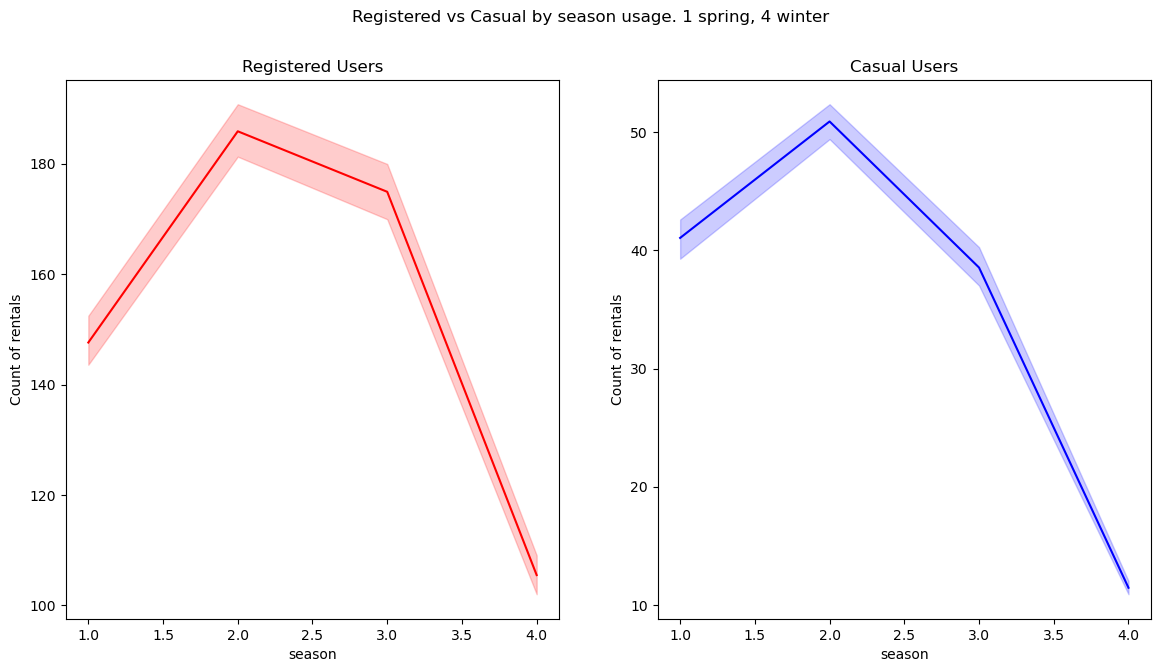

In [50]:
#Registered vs Casual by season name usage
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 2, figsize=(14,7))
#xorder=['spring', 'summer', 'fall,', 'winter']

sns.lineplot(data=cabi_hr, x='season', y='registered', ax=ax[0], color='red')
sns.lineplot(data=cabi_hr, x='season', y='casual', ax=ax[1],color='blue')

fig.suptitle('Registered vs Casual by season usage. 1 spring, 4 winter')

ax[0].set(xlabel = 'season',
          ylabel = 'Count of rentals',
          title = 'Registered Users')


ax[1].set(xlabel = 'season',
          ylabel = 'Count of rentals',
          title = 'Casual Users')

plt.show()

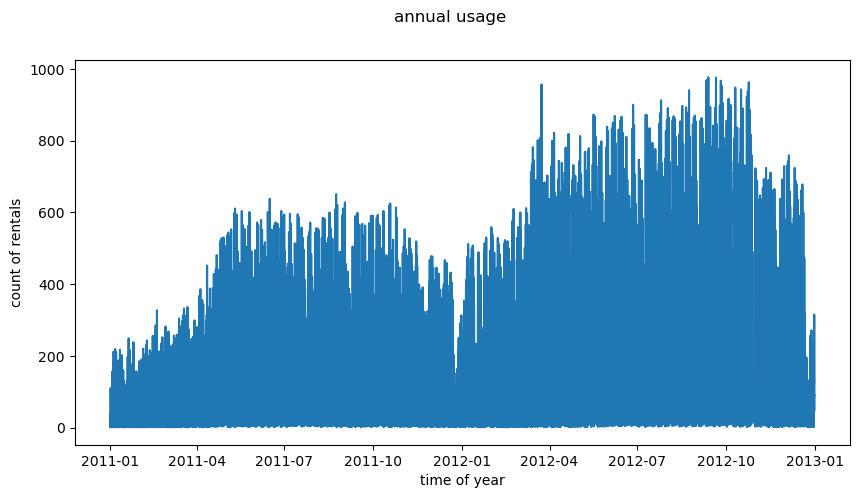

In [51]:
#annual usage trend
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=cabi_hr, x='dteday', y='cnt')
fig.suptitle('annual usage')
ax.set(ylabel='count of rentals', xlabel='time of year')
plt.show()

In [52]:
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday,is_workingday,weathersit_desc
0,1,2011-01-01 00:00:00,4,0,1,0,0,6,0,1,...,3,13,16,winter,2011,saturday,3.28,No,No,good
1,2,2011-01-01 01:00:00,4,0,1,1,0,6,0,1,...,8,32,40,winter,2011,saturday,2.34,No,No,good
2,3,2011-01-01 02:00:00,4,0,1,2,0,6,0,1,...,5,27,32,winter,2011,saturday,2.34,No,No,good
3,4,2011-01-01 03:00:00,4,0,1,3,0,6,0,1,...,3,10,13,winter,2011,saturday,3.28,No,No,good
4,5,2011-01-01 04:00:00,4,0,1,4,0,6,0,1,...,0,1,1,winter,2011,saturday,3.28,No,No,good


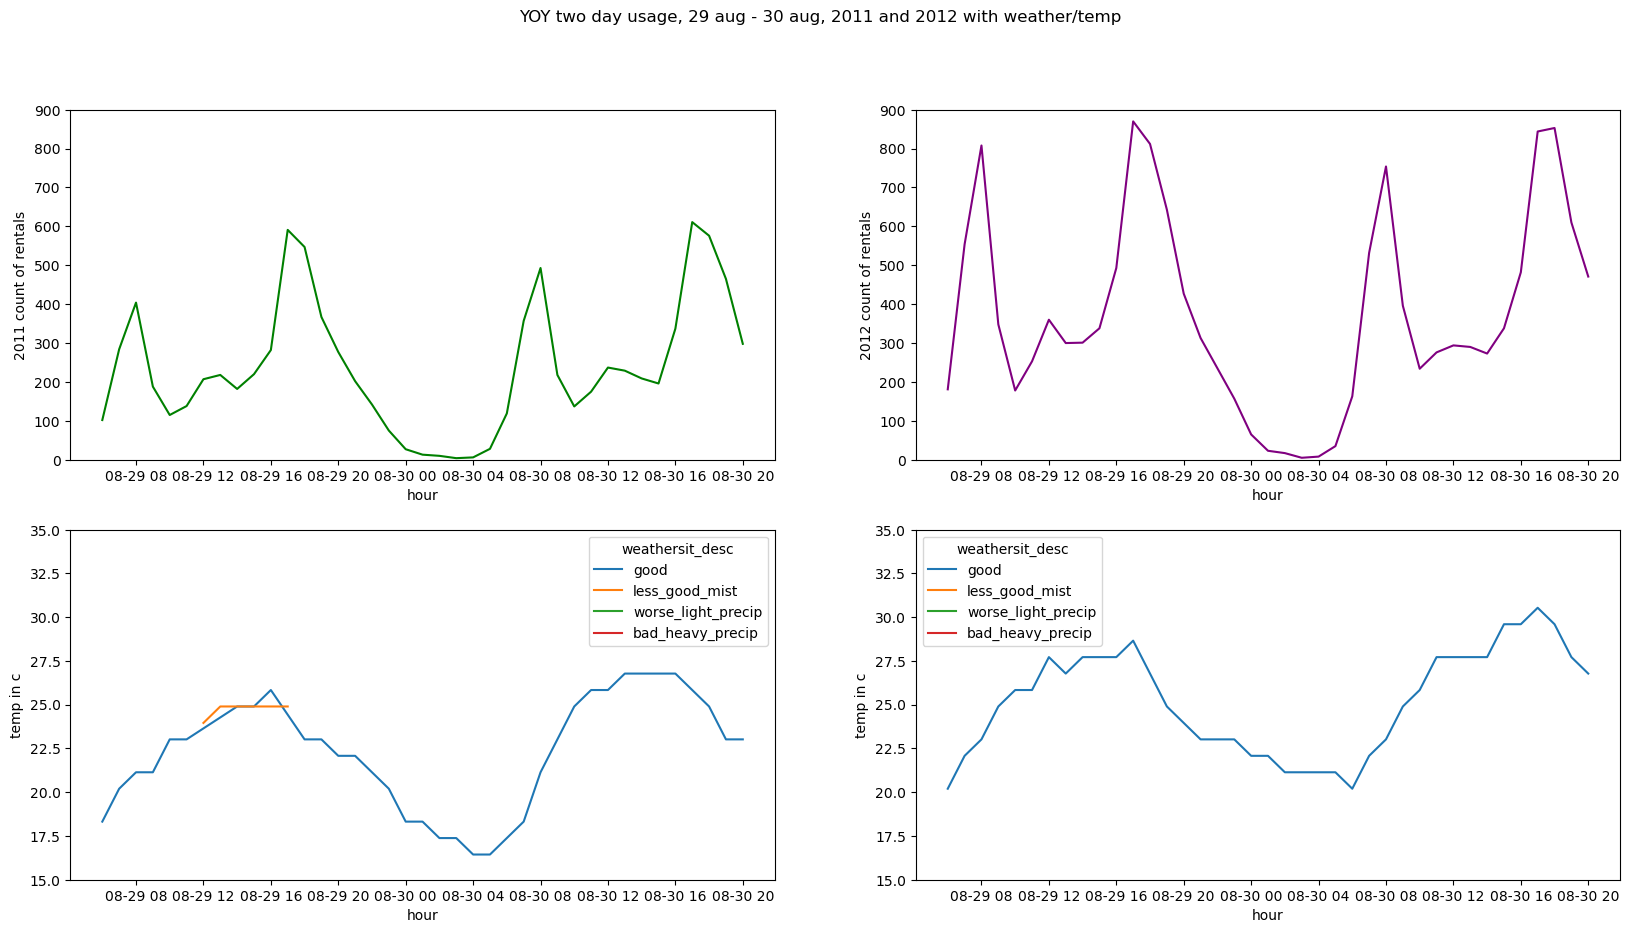

In [53]:
#YOY two day usage, 29 aug - 30 aug, 2011 and 2012 with weather/temp
fig, ax = plt.subplots(2, 2, figsize=(20,10))

day2012 = cabi_hr[(cabi_hr['dteday']<'2012-08-30 21:00:00') & (cabi_hr['dteday']>'2012-08-29 05:00:00')]['dteday']
day2011 = cabi_hr[(cabi_hr['dteday']<'2011-08-30 21:00:00') & (cabi_hr['dteday']>'2011-08-29 05:00:00')]['dteday']


sns.lineplot(data=cabi_hr, x=day2011, y='cnt', ax=ax[0,0], color='green')
sns.lineplot(data=cabi_hr, x=day2012, y='cnt', ax=ax[0,1], color='purple')
sns.lineplot(data=cabi_hr, x=day2011, y='temp_in_c', ax=ax[1,0], hue='weathersit_desc')
sns.lineplot(data=cabi_hr, x=day2012, y='temp_in_c', ax=ax[1,1], hue='weathersit_desc')

fig.suptitle('YOY two day usage, 29 aug - 30 aug, 2011 and 2012 with weather/temp')

ax[0,0].set(xlabel = 'hour',
          ylabel = '2011 count of rentals')
ax[0,0].set_ylim(0,900)

ax[0,1].set(xlabel = 'hour',
          ylabel = '2012 count of rentals')
ax[0,1].set_ylim(0,900)

ax[1,0].set(xlabel = 'hour',
            ylabel = 'temp in c')
ax[1,0].set_ylim(15,35)

ax[1,1].set(xlabel = 'hour',
            ylabel = 'temp in c')
ax[1,1].set_ylim(15,35)


# ax[0].set_xticks(range(0,24))
# ax[1].set_xticks(range(0,24))



plt.show()

In [54]:
##finding out how many rides happened on a given 2 day period
countsum = cabi_hr.loc[(cabi_hr['dteday']<'2011-08-30 23:59:00') & (cabi_hr['dteday']>'2011-08-29 00:00:00'), 'cnt'].sum()
countsum
#countsum = cabi_hr.query("['dteday']<'2011-08-30 21:00:00') & ['dteday']>'2011-08-29 05:00:00'")['cnt'].sum()

9804

In [55]:
#hurricane sandy gap: 10-29 at 00:00, to 10-30 at 13:00

cabi_hr[(cabi_hr['dteday']<'2012-10-30 23:00:00') & (cabi_hr['dteday']>'2012-10-28 05:00:00')]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday,is_workingday,weathersit_desc
15865,15866,2012-10-28 06:00:00,3,1,10,6,0,0,0,2,...,7,32,39,fall,2012,sunday,15.50,No,No,less_good_mist
15866,15867,2012-10-28 07:00:00,3,1,10,7,0,0,0,2,...,17,48,65,fall,2012,sunday,15.50,No,No,less_good_mist
15867,15868,2012-10-28 08:00:00,3,1,10,8,0,0,0,2,...,55,118,173,fall,2012,sunday,15.50,No,No,less_good_mist
15868,15869,2012-10-28 09:00:00,3,1,10,9,0,0,0,2,...,124,206,330,fall,2012,sunday,15.50,No,No,less_good_mist
15869,15870,2012-10-28 10:00:00,3,1,10,10,0,0,0,2,...,120,314,434,fall,2012,sunday,14.56,No,No,less_good_mist
15870,15871,2012-10-28 11:00:00,3,1,10,11,0,0,0,2,...,110,352,462,fall,2012,sunday,15.50,No,No,less_good_mist
15871,15872,2012-10-28 12:00:00,3,1,10,12,0,0,0,2,...,118,373,491,fall,2012,sunday,14.56,No,No,less_good_mist
15872,15873,2012-10-28 13:00:00,3,1,10,13,0,0,0,2,...,75,316,391,fall,2012,sunday,14.56,No,No,less_good_mist
15873,15874,2012-10-28 14:00:00,3,1,10,14,0,0,0,2,...,98,304,402,fall,2012,sunday,15.50,No,No,less_good_mist
15874,15875,2012-10-28 15:00:00,3,1,10,15,0,0,0,2,...,76,225,301,fall,2012,sunday,15.50,No,No,less_good_mist


In [56]:
cabi_hr[(cabi_hr['dteday']<'2011-08-30 21:00:00') & (cabi_hr['dteday']>'2011-08-29 05:00:00')]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday,is_workingday,weathersit_desc
5659,5660,2011-08-29 06:00:00,2,0,8,6,0,1,1,1,...,3,99,102,summer,2011,monday,18.32,No,Yes,good
5660,5661,2011-08-29 07:00:00,2,0,8,7,0,1,1,1,...,11,273,284,summer,2011,monday,20.20,No,Yes,good
5661,5662,2011-08-29 08:00:00,2,0,8,8,0,1,1,1,...,20,384,404,summer,2011,monday,21.14,No,Yes,good
5662,5663,2011-08-29 09:00:00,2,0,8,9,0,1,1,1,...,22,166,188,summer,2011,monday,21.14,No,Yes,good
5663,5664,2011-08-29 10:00:00,2,0,8,10,0,1,1,1,...,42,73,115,summer,2011,monday,23.02,No,Yes,good
5664,5665,2011-08-29 11:00:00,2,0,8,11,0,1,1,1,...,38,100,138,summer,2011,monday,23.02,No,Yes,good
5665,5666,2011-08-29 12:00:00,2,0,8,12,0,1,1,2,...,48,159,207,summer,2011,monday,23.96,No,Yes,less_good_mist
5666,5667,2011-08-29 13:00:00,2,0,8,13,0,1,1,2,...,48,170,218,summer,2011,monday,24.90,No,Yes,less_good_mist
5667,5668,2011-08-29 14:00:00,2,0,8,14,0,1,1,1,...,55,127,182,summer,2011,monday,24.90,No,Yes,good
5668,5669,2011-08-29 15:00:00,2,0,8,15,0,1,1,1,...,56,164,220,summer,2011,monday,24.90,No,Yes,good


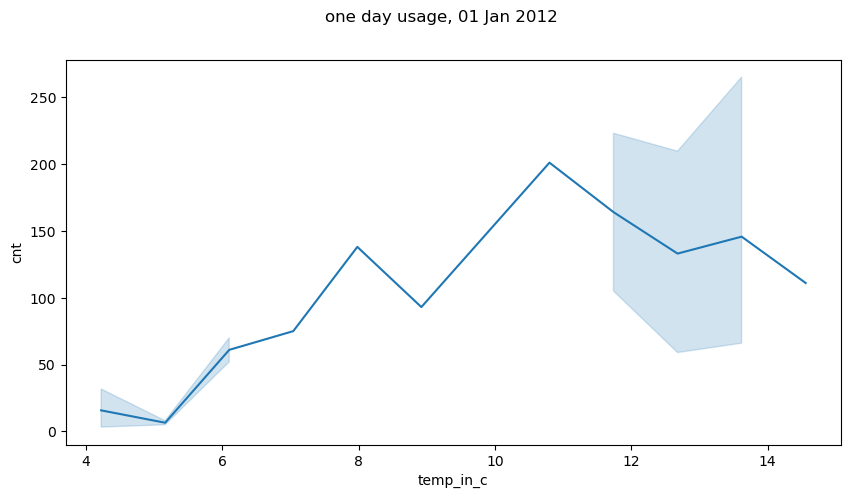

In [57]:
#one day usage, 1 jan 2012
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=cabi_hr[(cabi_hr['dteday']<'2012-01-02 00:00:00') & (cabi_hr['dteday']>'2012-01-01 00:00:00')], x='temp_in_c', y='cnt')
fig.suptitle('one day usage, 01 Jan 2012')
#ax.set(ylabel='count of rentals', xlabel='time of day', xticks=(range(0,24)))
plt.show()

In [58]:
cabi_hr[cabi_hr['dteday'] == '2012-08-21 12:00:00']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,year,dayname,temp_in_c,is_holiday,is_workingday,weathersit_desc
14239,14240,2012-08-21 12:00:00,2,1,8,12,0,2,1,1,...,79,226,305,summer,2012,tuesday,25.84,No,Yes,good


In [59]:
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season           17379 non-null  category      
 3   yr               17379 non-null  category      
 4   mnth             17379 non-null  category      
 5   hr               17379 non-null  category      
 6   holiday          17379 non-null  category      
 7   weekday          17379 non-null  category      
 8   workingday       17379 non-null  category      
 9   weathersit       17379 non-null  category      
 10  temp             17379 non-null  float64       
 11  atemp            17379 non-null  float64       
 12  hum              17379 non-null  float64       
 13  windspeed        17379 non-null  float64       
 14  casual           17379 non-null  int64

df.groupby(['column_name_1', 'column_name_2']).nunique().sort_values(by='count', ascending=False)
Dunno what this is for but clearly important for something.

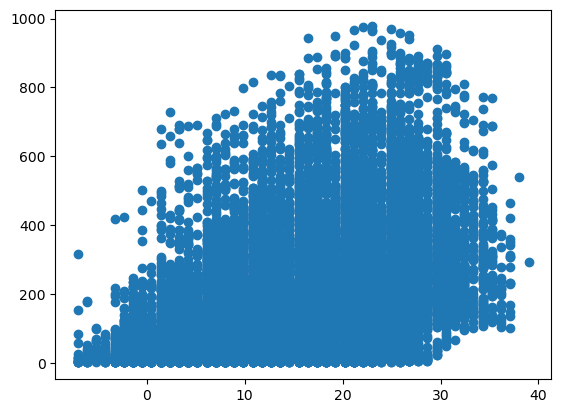

In [72]:
plt.scatter(cabi_hr['temp_in_c'], cabi_hr['cnt'])

In [76]:
#simple linear regression for temp_in_c
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X = np.array(cabi_hr['temp_in_c']).reshape((-1,1))
y = cabi_hr['cnt']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
model = LinearRegression()
model.fit(x_train, y_train)

model.predict(x_test)
model.score(x_test,y_test)
# pred_lr
# print("Accuracy score:", accuracy_score(y_test, pred_lr))
# print(confusion_matrix(y_test, pred_lr))
# print("Classification Report \n", classification_report(y_test, pred_lr))
# kappa = cohen_kappa_score(y_test, pred_lr)
# print("Cohen-Kappa score:", kappa)

0.1741943059231683

In [98]:
#simple linear regression for temp_in_c, with rsquared and MSE
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X = np.array(cabi_hr['temp_in_c']).reshape((-1,1))
y = cabi_hr['cnt']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=10)
model = LinearRegression()
model.fit(x_train, y_train)
r_sq = model.score(x_test,y_test)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred}")

# y = [11,20,19,17,10]
# y_bar = [12,18,19.5,18,9]
summation = 0  #variable to store the summation of differences
n = len(y_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
    difference = y_test[i] - y_pred[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print(f"The Mean Square Error is: " ,MSE)

print(len(y_test)) 
print(len(y_pred))

coefficient of determination: 0.15583994636474607
intercept: 64.07731168207398
slope: [8.19960823]
predicted response:
[222.0017662  214.29413446 275.95518835 ... 137.2178171  275.95518835
 198.87887099]


KeyError: 1

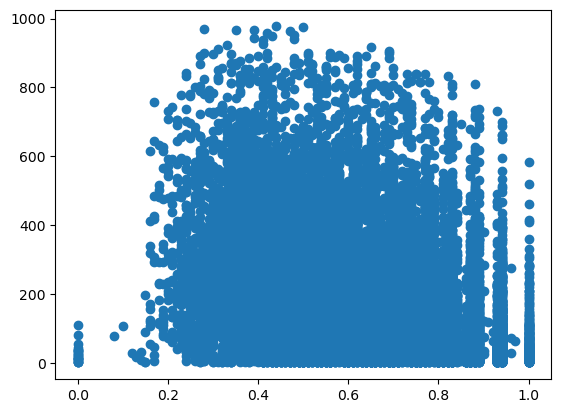

In [89]:
plt.scatter(cabi_hr['hum'], cabi_hr['cnt'])

In [91]:
#simple linear regression for hum(idity)
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X = np.array(cabi_hr['hum']).reshape((-1,1))
y = cabi_hr['cnt']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
model = LinearRegression()
model.fit(x_train, y_train)

model.predict(x_test)
model.score(x_test,y_test)

0.11938783410147358

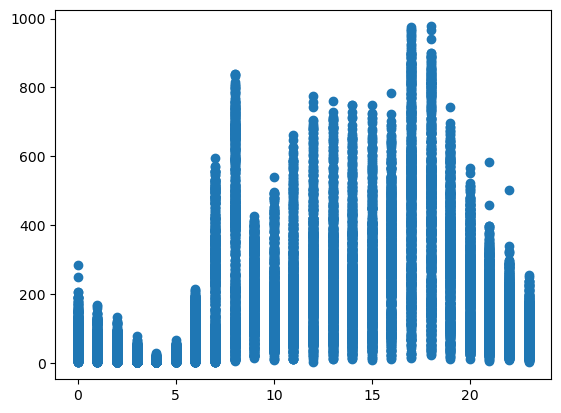

In [77]:
plt.scatter(cabi_hr['hr'], cabi_hr['cnt'])

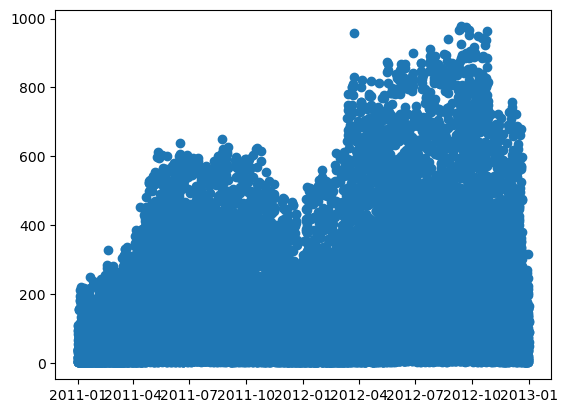

In [78]:
plt.scatter(cabi_hr['dteday'], cabi_hr['cnt'])

In [80]:
#simple linear regression hr of day
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X = np.array(cabi_hr['hr']).reshape((-1,1))
y = cabi_hr['cnt']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
model = LinearRegression()
model.fit(x_train, y_train)

model.predict(x_test)
model.score(x_test,y_test)

0.14830978175034393

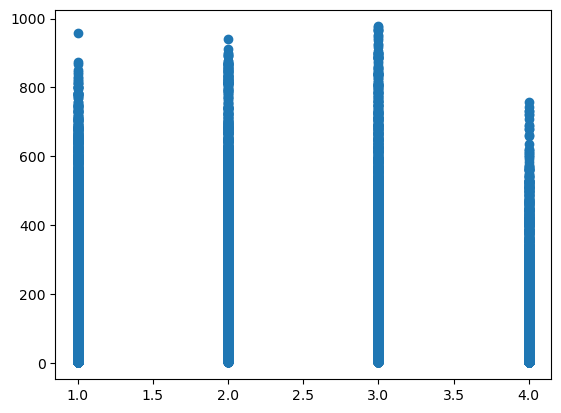

In [88]:
plt.scatter(cabi_hr['season'], cabi_hr['cnt'])